# Connect to G-Drive

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Change Notebook Default Directory

In [2]:
import os
file_dir = "/content/drive/MyDrive/DS_PROJECT2_HOMEWORK"
os.chdir(file_dir)

In [3]:
!ls

clean_dataset.csv		ecommerce_preprocessed.csv
DSP_2_Data_Visualization.ipynb	link_GoogleLooker.txt
ecommerce_dataset.csv


# Import Libraries

In [4]:
# Data Analysis Library
import pandas as pd
import numpy as np

# Data Viz libray
import matplotlib.pyplot as plt
import seaborn as sns

# Regex Library
import regex as re

# Exploratory Data Analysis (EDA)

EDA Explanation from IBM : https://www.ibm.com/topics/exploratory-data-analysis#:~:text=Exploratory%20data%20analysis%20(EDA)%20is,often%20employing%20data%20visualization%20methods.

In [5]:
df = pd.read_csv('ecommerce_dataset.csv')
df.head()

<ipython-input-5-4f1109575f20>:1: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ecommerce_dataset.csv')


,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
0,AU-2015-1,2015-11-09,2015-11-17,8.0,First Class,Auto & Accessories,Car Media Players,$140.00,2,0.05,...,$4.60,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov
1,AU-2015-2,2015-06-30,2015-07-02,2.0,First Class,Auto & Accessories,Car Speakers,$211.00,3,0.03,...,$11.20,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun
2,AU-2015-3,2015-12-05,2015-12-13,8.0,First Class,Auto & Accessories,Car Body Covers,$117.00,5,0.01,...,$3.10,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec
3,AU-2015-4,2015-05-09,2015-05-16,7.0,First Class,Auto & Accessories,Car & Bike Care,$118.00,2,0.05,...,$2.60,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May
4,AU-2015-5,2015-07-09,2015-07-18,9.0,First Class,Auto & Accessories,Tyre,$250.00,1,0.04,...,$16.00,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul


In [6]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Aging', 'Ship Mode',
       'Product Category', 'Product', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Country', 'Region',
       'Months'],
      dtype='object')

## Dataframe Information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51303 entries, 0 to 51302
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          51303 non-null  object 
 1   Order Date        51303 non-null  object 
 2   Ship Date         51303 non-null  object 
 3   Aging             51302 non-null  float64
 4   Ship Mode         51303 non-null  object 
 5   Product Category  51303 non-null  object 
 6   Product           51303 non-null  object 
 7   Sales             51303 non-null  object 
 8   Quantity          51302 non-null  object 
 9   Discount          51303 non-null  object 
 10  Profit            51303 non-null  object 
 11  Shipping Cost     51303 non-null  object 
 12  Order Priority    51301 non-null  object 
 13  Customer ID       51302 non-null  object 
 14  Customer Name     51303 non-null  object 
 15  Segment           51302 non-null  object 
 16  City              51303 non-null  object

In [8]:
df.isna().sum()

Order ID            0
Order Date          0
Ship Date           0
Aging               1
Ship Mode           0
Product Category    0
Product             0
Sales               0
Quantity            1
Discount            0
Profit              0
Shipping Cost       0
Order Priority      2
Customer ID         1
Customer Name       0
Segment             1
City                0
State               0
Country             0
Region              1
Months              0
dtype: int64

insight sementar :
- Terdapat Null value pada aging, quantity, order_priority, customer_id, segment, dan region.
- Order ID & Customer ID apakah unique?.
- Merubah tipe data Order Date & Ship Date bertipe (object -> timestamp).
- Sales, Shipping cost, Discount, profit  (Object -> float).
- Quantity (Object -> int)

## Change Columns name
Akan ada beberapa kolom yang akan direname seperti:
- Sales -> Sales (dollar)
- Shipping Cost -> Shipping Cost (dollar)

Selain itu kita dapat mengubah nama kolom menjadi nama kecil semuanya, dan menghilangkan spasi, diubah dengan "_"

In [9]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Aging', 'Ship Mode',
       'Product Category', 'Product', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Country', 'Region',
       'Months'],
      dtype='object')

### Rename Columns With Dollar Values

In [10]:
New_Columns_Name = {
    'Sales' : 'Sales($)',
    'Shipping Cost' :  'Shipping Cost($)',
    'Profit' : 'Profit($)'
}

df.rename(columns=New_Columns_Name, inplace=True)

In [11]:
df.head()

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales($),Quantity,Discount,...,Shipping Cost($),Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
0,AU-2015-1,2015-11-09,2015-11-17,8.0,First Class,Auto & Accessories,Car Media Players,$140.00,2,0.05,...,$4.60,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov
1,AU-2015-2,2015-06-30,2015-07-02,2.0,First Class,Auto & Accessories,Car Speakers,$211.00,3,0.03,...,$11.20,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun
2,AU-2015-3,2015-12-05,2015-12-13,8.0,First Class,Auto & Accessories,Car Body Covers,$117.00,5,0.01,...,$3.10,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec
3,AU-2015-4,2015-05-09,2015-05-16,7.0,First Class,Auto & Accessories,Car & Bike Care,$118.00,2,0.05,...,$2.60,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May
4,AU-2015-5,2015-07-09,2015-07-18,9.0,First Class,Auto & Accessories,Tyre,$250.00,1,0.04,...,$16.00,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul


### Columns Lowercase

Source Doc : https://saturncloud.io/blog/how-to-make-pandas-dataframe-column-headers-all-lowercase/

In [12]:
df.columns = df.columns.str.lower()
df.head()

,order id,order date,ship date,aging,ship mode,product category,product,sales($),quantity,discount,...,shipping cost($),order priority,customer id,customer name,segment,city,state,country,region,months
0,AU-2015-1,2015-11-09,2015-11-17,8.0,First Class,Auto & Accessories,Car Media Players,$140.00,2,0.05,...,$4.60,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov
1,AU-2015-2,2015-06-30,2015-07-02,2.0,First Class,Auto & Accessories,Car Speakers,$211.00,3,0.03,...,$11.20,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun
2,AU-2015-3,2015-12-05,2015-12-13,8.0,First Class,Auto & Accessories,Car Body Covers,$117.00,5,0.01,...,$3.10,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec
3,AU-2015-4,2015-05-09,2015-05-16,7.0,First Class,Auto & Accessories,Car & Bike Care,$118.00,2,0.05,...,$2.60,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May
4,AU-2015-5,2015-07-09,2015-07-18,9.0,First Class,Auto & Accessories,Tyre,$250.00,1,0.04,...,$16.00,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul


### Remove Spaces For Each Name in The Column

In [13]:
df.columns = df.columns.str.replace(' ', '_')
df.head()

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
0,AU-2015-1,2015-11-09,2015-11-17,8.0,First Class,Auto & Accessories,Car Media Players,$140.00,2,0.05,...,$4.60,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov
1,AU-2015-2,2015-06-30,2015-07-02,2.0,First Class,Auto & Accessories,Car Speakers,$211.00,3,0.03,...,$11.20,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun
2,AU-2015-3,2015-12-05,2015-12-13,8.0,First Class,Auto & Accessories,Car Body Covers,$117.00,5,0.01,...,$3.10,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec
3,AU-2015-4,2015-05-09,2015-05-16,7.0,First Class,Auto & Accessories,Car & Bike Care,$118.00,2,0.05,...,$2.60,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May
4,AU-2015-5,2015-07-09,2015-07-18,9.0,First Class,Auto & Accessories,Tyre,$250.00,1,0.04,...,$16.00,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51303 entries, 0 to 51302
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          51303 non-null  object 
 1   order_date        51303 non-null  object 
 2   ship_date         51303 non-null  object 
 3   aging             51302 non-null  float64
 4   ship_mode         51303 non-null  object 
 5   product_category  51303 non-null  object 
 6   product           51303 non-null  object 
 7   sales($)          51303 non-null  object 
 8   quantity          51302 non-null  object 
 9   discount          51303 non-null  object 
 10  profit($)         51303 non-null  object 
 11  shipping_cost($)  51303 non-null  object 
 12  order_priority    51301 non-null  object 
 13  customer_id       51302 non-null  object 
 14  customer_name     51303 non-null  object 
 15  segment           51302 non-null  object 
 16  city              51303 non-null  object

Notes:
- Nama Kolom Sales, profit dan shipping cost telah disesuaikan.
- Kita telah merubah nama kolom menjadi lowercase.
- menghilangkan spasi pada setiap kolom.

## Customize the variable type in each column
Terdapat beberapa kolom yang memiliki variabel yang tidak sesuai, seperti:
- order_date
- ship_date
- sales(\$)
- quantity
- discount
- profit(\$)
- shipping_cost(\$)

In [15]:
df.head()

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
0,AU-2015-1,2015-11-09,2015-11-17,8.0,First Class,Auto & Accessories,Car Media Players,$140.00,2,0.05,...,$4.60,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov
1,AU-2015-2,2015-06-30,2015-07-02,2.0,First Class,Auto & Accessories,Car Speakers,$211.00,3,0.03,...,$11.20,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun
2,AU-2015-3,2015-12-05,2015-12-13,8.0,First Class,Auto & Accessories,Car Body Covers,$117.00,5,0.01,...,$3.10,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec
3,AU-2015-4,2015-05-09,2015-05-16,7.0,First Class,Auto & Accessories,Car & Bike Care,$118.00,2,0.05,...,$2.60,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May
4,AU-2015-5,2015-07-09,2015-07-18,9.0,First Class,Auto & Accessories,Tyre,$250.00,1,0.04,...,$16.00,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51303 entries, 0 to 51302
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          51303 non-null  object 
 1   order_date        51303 non-null  object 
 2   ship_date         51303 non-null  object 
 3   aging             51302 non-null  float64
 4   ship_mode         51303 non-null  object 
 5   product_category  51303 non-null  object 
 6   product           51303 non-null  object 
 7   sales($)          51303 non-null  object 
 8   quantity          51302 non-null  object 
 9   discount          51303 non-null  object 
 10  profit($)         51303 non-null  object 
 11  shipping_cost($)  51303 non-null  object 
 12  order_priority    51301 non-null  object 
 13  customer_id       51302 non-null  object 
 14  customer_name     51303 non-null  object 
 15  segment           51302 non-null  object 
 16  city              51303 non-null  object

### order_date & ship_date to date time
- order_date
- ship_date

Dokumentasi Source Code:

- source to datetime: https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
- source strftime() format: https://www.programiz.com/python-programming/datetime/strftime

In [17]:
df['order_date'] = pd.to_datetime(df['order_date'], format='%Y-%m-%d')
df['ship_date'] = pd.to_datetime(df['ship_date'], format='%Y-%m-%d')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51303 entries, 0 to 51302
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          51303 non-null  object        
 1   order_date        51303 non-null  datetime64[ns]
 2   ship_date         51303 non-null  datetime64[ns]
 3   aging             51302 non-null  float64       
 4   ship_mode         51303 non-null  object        
 5   product_category  51303 non-null  object        
 6   product           51303 non-null  object        
 7   sales($)          51303 non-null  object        
 8   quantity          51302 non-null  object        
 9   discount          51303 non-null  object        
 10  profit($)         51303 non-null  object        
 11  shipping_cost($)  51303 non-null  object        
 12  order_priority    51301 non-null  object        
 13  customer_id       51302 non-null  object        
 14  customer_name     5130

In [19]:
df.head()

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
0,AU-2015-1,2015-11-09,2015-11-17,8.0,First Class,Auto & Accessories,Car Media Players,$140.00,2,0.05,...,$4.60,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov
1,AU-2015-2,2015-06-30,2015-07-02,2.0,First Class,Auto & Accessories,Car Speakers,$211.00,3,0.03,...,$11.20,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun
2,AU-2015-3,2015-12-05,2015-12-13,8.0,First Class,Auto & Accessories,Car Body Covers,$117.00,5,0.01,...,$3.10,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec
3,AU-2015-4,2015-05-09,2015-05-16,7.0,First Class,Auto & Accessories,Car & Bike Care,$118.00,2,0.05,...,$2.60,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May
4,AU-2015-5,2015-07-09,2015-07-18,9.0,First Class,Auto & Accessories,Tyre,$250.00,1,0.04,...,$16.00,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul


### sales(\$), profit(\$), and shipping_cost(\$)

- sales(\$) (object) -> sales(\$) (float)
- profit(\$) (object) -> profit(\$) (float)
- shipping_cost(\$) (object) -> shipping_cost(\$) (float)

Menghilangkan Simbol \$ pada setiap values pada kolom sales(\$), profit(\$), dan shipping_cost(\$)

In [20]:
# Menghilangkan simbol $, pada setiap values pada kolom sales, profit dan shipping_cost

# Cara Ke - 1
df['sales($)'] = df['sales($)'].str.replace('$', '', regex=True)
df['shipping_cost($)'] = df['shipping_cost($)'].str.replace('$', '', regex=True)
df['profit($)'] = df['profit($)'].str.replace('$', '', regex=True)

In [21]:
# Cara Ke - 2
dfRemoveDollar = df.loc[:,('sales($)', 'profit($)', 'shipping_cost($)')]

for n in dfRemoveDollar:
  df.loc[:,n] = dfRemoveDollar.loc[:,n].str.replace('$', '', regex=True)
df.head()

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
0,AU-2015-1,2015-11-09,2015-11-17,8.0,First Class,Auto & Accessories,Car Media Players,140.00,2,0.05,...,4.60,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov
1,AU-2015-2,2015-06-30,2015-07-02,2.0,First Class,Auto & Accessories,Car Speakers,211.00,3,0.03,...,11.20,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun
2,AU-2015-3,2015-12-05,2015-12-13,8.0,First Class,Auto & Accessories,Car Body Covers,117.00,5,0.01,...,3.10,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec
3,AU-2015-4,2015-05-09,2015-05-16,7.0,First Class,Auto & Accessories,Car & Bike Care,118.00,2,0.05,...,2.60,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May
4,AU-2015-5,2015-07-09,2015-07-18,9.0,First Class,Auto & Accessories,Tyre,250.00,1,0.04,...,16.00,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul


Merubah tipe data pada kolom sales(\$), profit(\$), dan shipping_cost(\$) dari object menjadi sebuah float

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51303 entries, 0 to 51302
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          51303 non-null  object        
 1   order_date        51303 non-null  datetime64[ns]
 2   ship_date         51303 non-null  datetime64[ns]
 3   aging             51302 non-null  float64       
 4   ship_mode         51303 non-null  object        
 5   product_category  51303 non-null  object        
 6   product           51303 non-null  object        
 7   sales($)          51303 non-null  object        
 8   quantity          51302 non-null  object        
 9   discount          51303 non-null  object        
 10  profit($)         51303 non-null  object        
 11  shipping_cost($)  51303 non-null  object        
 12  order_priority    51301 non-null  object        
 13  customer_id       51302 non-null  object        
 14  customer_name     5130

Melakukan Checking pada setiap kolom values apakah terdapat string
dengan unique() (Cara paling simple)

In [23]:
df['sales($)'].unique()

array(['140.00', '211.00', '117.00', '118.00', '250.00', '72.00', '54.00',
       '114.00', '231.00', '0.xf', '220.00', '104.00', '149.00', '222.00',
       '199.00', '111.00', '33.00', '83.00', '192.00', '65.00', '130.00',
       '216.00', '34.00', '228.00', '67.00', '78.00', '119.00', '124.00',
       '70.00', '133.00', '248.00', '196.00', '218.00', '109.00', '85.00',
       '122.00', '224.00', '213.00', '62.00', '159.00'], dtype=object)

Di df['sales($)'] terdapat teks '0.xf'.

In [24]:
df.loc[df['sales($)'] == '0.xf',:]

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
793,AU-2015-794,2015-10-06,2015-10-12,6.0,First Class,Auto & Accessories,Car Speakers,0.xf,3,0.01,...,12.50,Critical,RE-00794,Schwartz Laware,Consumer,Bandung,Jawa Barat,Indonesia,Southeast Asia,Oct


In [25]:
df[(df['product'] == 'Car Speakers') & (df['sales($)'] == '211.00')]

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
1,AU-2015-2,2015-06-30,2015-07-02,2.0,First Class,Auto & Accessories,Car Speakers,211.00,3,0.03,...,11.20,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun
10,AU-2015-11,2015-11-16,2015-11-26,10.0,First Class,Auto & Accessories,Car Speakers,211.00,4,0.01,...,12.30,Critical,ED-0011,Johns Reed,Corporate,Taipei,Taipei City,Taiwan,North Asia,Nov
19,AU-2015-20,2015-07-27,2015-08-02,6.0,First Class,Auto & Accessories,Car Speakers,211.00,2,0.02,...,12.30,Critical,ED-0020,Johns Reed,Corporate,Taipei,Taipei City,Taiwan,North Asia,Jul
28,AU-2015-29,2015-04-11,2015-04-18,7.0,First Class,Auto & Accessories,Car Speakers,211.00,3,0.03,...,11.20,Medium,ED-0029,Everett Sweed,Consumer,Chinandega,Chinandega,Nicaragua,Central,Apr
37,AU-2015-38,2015-08-01,2015-08-04,3.0,First Class,Auto & Accessories,Car Speakers,211.00,4,0.01,...,12.30,Critical,YD-0038,Moran Lloyd,Consumer,Augsburg,Bavaria,Germany,Central,Aug
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7392,AU-2015-7393,2015-02-21,2015-02-26,5.0,First Class,Auto & Accessories,Car Speakers,211.00,5,0.02,...,11.00,Medium,CH-007393,Oliver Dortch,Corporate,Donets'k,Donetsk,Ukraine,EMEA,Feb
7401,AU-2015-7402,2015-09-29,2015-09-30,1.0,First Class,Auto & Accessories,Car Speakers,211.00,4,0.04,...,9.70,High,EN-007402,Mullins Hansen,Consumer,Amasya,Amasya,Turkey,EMEA,Sep
7410,AU-2015-7411,2015-05-01,2015-05-10,9.0,First Class,Auto & Accessories,Car Speakers,211.00,3,0.01,...,12.50,Medium,NS-007411,Hines Hawkins,Consumer,Tetouan,Tanger-Tétouan,Morocco,Africa,May
7421,AU-2015-7422,2015-04-12,2015-04-15,3.0,First Class,Auto & Accessories,Car Speakers,211.00,4,0.04,...,9.70,Medium,AU-007422,Horton Gastineau,Consumer,Wilmington,North Carolina,United States,South,Apr


INSIGHT:
- Semua jenis Produk Car Speakers memiliki sales($) yang sama, yakni 211.00
- Kita dapat mengubah values = '0.xf' dengan 211.00

In [26]:
df.loc[df['sales($)'] == '0.xf', 'sales($)'] = df.loc[df['sales($)'] == '0.xf', 'sales($)'].replace('0.xf', '211.00')

In [27]:
df['sales($)'].unique()

array(['140.00', '211.00', '117.00', '118.00', '250.00', '72.00', '54.00',
       '114.00', '231.00', '220.00', '104.00', '149.00', '222.00',
       '199.00', '111.00', '33.00', '83.00', '192.00', '65.00', '130.00',
       '216.00', '34.00', '228.00', '67.00', '78.00', '119.00', '124.00',
       '70.00', '133.00', '248.00', '196.00', '218.00', '109.00', '85.00',
       '122.00', '224.00', '213.00', '62.00', '159.00'], dtype=object)

In [28]:
df['sales($)'] = df['sales($)'].astype(float)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51303 entries, 0 to 51302
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          51303 non-null  object        
 1   order_date        51303 non-null  datetime64[ns]
 2   ship_date         51303 non-null  datetime64[ns]
 3   aging             51302 non-null  float64       
 4   ship_mode         51303 non-null  object        
 5   product_category  51303 non-null  object        
 6   product           51303 non-null  object        
 7   sales($)          51303 non-null  float64       
 8   quantity          51302 non-null  object        
 9   discount          51303 non-null  object        
 10  profit($)         51303 non-null  object        
 11  shipping_cost($)  51303 non-null  object        
 12  order_priority    51301 non-null  object        
 13  customer_id       51302 non-null  object        
 14  customer_name     5130

selanjutnya mengubah tipe object pada profit($) menjadi float.

In [30]:
df['profit($)'].unique()

array(['46.00', '112.00', '31.20', '26.20', '160.00', '24.00', '54.00',
       '22.60', '116.40', '54.40', '122.60', '18.30', '35.60', '140.00',
       '18.00', '27.00', '93.30', '30.90', '150.00', '24.90', '144.10',
       '55.80', '34.70', '27.40', '165.00', '13.50', '29.40', '127.90',
       '32.00', '32.30', '14.40', '132.50', '10.80', '15.80', '114.00',
       '128.90', '13.60', '36.00', '11.20', '51.60', '27.60', '20.30',
       '30.60', '53.00', '109.90', '36.80', '167.50', '72.00', '120.50',
       '28.30', '58.60', '99.40', '30.00', '28.60', '120.00', '104.80',
       '124.70', '19.10', '141.80', '26.50', '137.10', '43.20', '7.80',
       '34.50', '157.50', '5.50', '105.70', '27.20', '148.70', '155.00',
       '114.10', '139.50', '88.80', '8.50', '32.10', '162.50', '31.70',
       '123.30', '145.00', '48.80', '19.50', '25.00', '126.80', '23.80',
       '33.30', '23.70', '130.20', '118.30', '39.00', '23.00', '130.00',
       '16.90', '33.50', '78.30', '107.50', '97.20', '146.40

In [31]:
df['profit($)'] = df['profit($)'].astype(float)

selanjutnya mengubah tipe object pada shipping_cost($) menjadi float.

In [32]:
df['shipping_cost($)'].unique()

array(['4.60', '11.20', '3.10', '2.60', '16.00', '2.40', '5.40', '2.30',
       '11.60', '12.30', '1.80', '3.60', '14.00', '2.70', '9.30', '15.00',
       '2.50', '14.40', '5.60', '3.50', '16.50', '1.40', '2.90', '12.80',
       '3.20', '13.30', '1.10', '1.60', '11.40', '12.90', '5.20', '2.80',
       '2.00', '5.30', '11.00', '3.70', '16.80', '7.20', '12.00', '5.90',
       '9.90', '3.00', '10.50', '12.50', '1.90', '14.20', '13.70', '4.30',
       '0.80', '3.40', '15.80', '0.60', '10.60', '14.90', '15.50',
       '13.90', '8.90', '0.90', '16.30', '14.50', '4.90', '12.70', '3.30',
       '13.00', '11.80', '3.90', '1.70', '7.80', '10.80', '9.70', '14.60',
       '5.70', '14.80', '3.80', 'test', '4.70', '13.60', '2.10', '6.30',
       '11.50', '9.50', '4.40', '10.70', '0.30', '8.30', '10.40', '1.20',
       '9.80', '11.10', '12.20', '13.80', '8.70', '6.50', '9.60', '6.80',
       '12.40', '7.90', '10.00', '2.20', '13.10', '11.30', '4.20',
       '10.20', '10.90', '1.50', '10.30', '1.30', 

Terdapat str 'test' pada kolom tersebut, kita perlu ganti dengan nilai sehingga kolom tersebut dapat diubah menjadi float.

In [33]:
df[(df['shipping_cost($)'] == 'test')]

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
535,AU-2015-536,2015-03-21,2015-03-24,3.0,First Class,Auto & Accessories,Tyre,250.0,4,0.02,...,test,Critical,ON-00536,Webster Jordon,Consumer,Guiyang,Guizhou,China,North Asia,Mar


HIPOTESIS:
- Mungkin disini kita dapat mengisi shipping_cost($) dengan melihat country dan statenya

In [34]:
df[(df['country'] == 'China') & (df['state'] == 'Guizhou')]

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
535,AU-2015-536,2015-03-21,2015-03-24,3.0,First Class,Auto & Accessories,Tyre,250.0,4,0.02,...,test,Critical,ON-00536,Webster Jordon,Consumer,Guiyang,Guizhou,China,North Asia,Mar
958,AU-2015-959,2015-03-19,2015-03-24,5.0,First Class,Auto & Accessories,Tyre,250.0,1,0.05,...,15.80,Critical,ON-00959,Webster Jordon,Consumer,Guiyang,Guizhou,China,North Asia,Mar
2160,AU-2015-2161,2015-02-14,2015-02-22,8.0,First Class,Auto & Accessories,Car Media Players,140.0,4,0.04,...,3.80,Critical,ON-002161,Webster Jordon,Consumer,Guiyang,Guizhou,China,North Asia,Feb
3686,AU-2015-3687,2015-06-04,2015-06-11,7.0,First Class,Auto & Accessories,Bike Tyres,72.0,3,0.01,...,2.40,Critical,ON-003687,Webster Jordon,Consumer,Guiyang,Guizhou,China,North Asia,Jun
10820,HF-2015-615,2015-09-17,2015-09-18,1.0,Second Class,Home & Furniture,Sofas,67.0,1,0.03,...,6.70,High,AS-0041596,Wise Koutras,Corporate,Bijie,Guizhou,China,North Asia,Sep
15502,HF-2015-5297,2015-12-29,2016-01-03,5.0,Second Class,Home & Furniture,Shoe Rack,124.0,4,0.05,...,1.90,High,SE-0046278,Manning House,Consumer,Bijie,Guizhou,China,North Asia,Dec
21246,FA-2015-732,2015-07-12,2015-07-16,4.0,Standard Class,Fashion,Casula Shoes,122.0,2,0.05,...,3.00,High,LL-0010938,Marshall Carroll,Consumer,Zunyi,Guizhou,China,North Asia,Jul
21597,FA-2015-1083,2015-01-31,2015-02-03,3.0,Standard Class,Fashion,Sports Wear,85.0,2,0.05,...,4.30,High,HY-0011289,Mathis Mccarthy,Consumer,Anshun,Guizhou,China,North Asia,Jan
23689,FA-2015-3175,2015-12-22,2015-12-24,2.0,Standard Class,Fashion,Running Shoes,224.0,1,0.02,...,14.00,High,LL-0013381,Marshall Carroll,Consumer,Zunyi,Guizhou,China,North Asia,Dec
25289,FA-2015-4775,2015-09-05,2015-09-15,10.0,Standard Class,Fashion,T - Shirts,248.0,2,0.03,...,15.30,High,HY-0014981,Mathis Mccarthy,Consumer,Anshun,Guizhou,China,North Asia,Sep


INSIGHT:
- Webster Jordon memesan ban dengan alamat yang sama, dengan quantity 1, memiliki nilai shipping cost sebesar 15.8, dengan anggapan tersebut jika quantity sebanyak 4, dengan barang dan alamat yang sama, maka shipping cost = 15.8 * 4

In [35]:
df.loc[df['shipping_cost($)'] == 'test', 'shipping_cost($)'] = df.loc[df['shipping_cost($)'] == 'test', 'shipping_cost($)'].replace('test', '63.2')

In [36]:
df[df['shipping_cost($)'] == '63.2']

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
535,AU-2015-536,2015-03-21,2015-03-24,3.0,First Class,Auto & Accessories,Tyre,250.0,4,0.02,...,63.2,Critical,ON-00536,Webster Jordon,Consumer,Guiyang,Guizhou,China,North Asia,Mar


In [37]:
df['shipping_cost($)'] = df['shipping_cost($)'].astype(float)

### Quantity filling Missing value & change (object) to (int)
merubah tipe data quantity menjadi int

Mengisi Missing Value

In [38]:
df.head()

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
0,AU-2015-1,2015-11-09,2015-11-17,8.0,First Class,Auto & Accessories,Car Media Players,140.0,2,0.05,...,4.6,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov
1,AU-2015-2,2015-06-30,2015-07-02,2.0,First Class,Auto & Accessories,Car Speakers,211.0,3,0.03,...,11.2,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun
2,AU-2015-3,2015-12-05,2015-12-13,8.0,First Class,Auto & Accessories,Car Body Covers,117.0,5,0.01,...,3.1,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec
3,AU-2015-4,2015-05-09,2015-05-16,7.0,First Class,Auto & Accessories,Car & Bike Care,118.0,2,0.05,...,2.6,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May
4,AU-2015-5,2015-07-09,2015-07-18,9.0,First Class,Auto & Accessories,Tyre,250.0,1,0.04,...,16.0,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul


In [39]:
df[(df['quantity'] == 'abc') | df['quantity'].isna()]

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
95,AU-2015-96,2015-04-10,2015-04-15,5.0,First Class,Auto & Accessories,Bike Tyres,72.0,NaN,0.01,...,3.6,Critical,ON-0096,Stokes Knudson,Consumer,Tupã,São Paulo,Brazil,South,Apr
321,AU-2015-322,2015-04-21,2015-04-24,3.0,First Class,Auto & Accessories,Car Mat,54.0,abc,0.02,...,5.4,Critical,CH-00322,May Französisch,Consumer,Casablanca,Grand Casablanca,Morocco,Africa,Apr


Melihat kemungkinan quantity dapat diisi dengan product

In [40]:
df[(df['product'] == 'Bike Tyres') & (df['sales($)'] == 72.0) & (df['shipping_cost($)'] == 3.6)]

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
50,AU-2015-51,2015-06-05,2015-06-08,3.0,First Class,Auto & Accessories,Bike Tyres,72.0,2,0.01,...,3.6,Critical,AN-0051,Smith Abelman,Consumer,Wuhan,Hubei,China,North Asia,Jun
59,AU-2015-60,2015-09-04,2015-09-07,3.0,First Class,Auto & Accessories,Bike Tyres,72.0,2,0.03,...,3.6,High,ON-0060,Yates Johnson,Consumer,Hamburg,Hamburg,Germany,Central,Sep
86,AU-2015-87,2015-03-28,2015-04-04,7.0,First Class,Auto & Accessories,Bike Tyres,72.0,2,0.02,...,3.6,High,EN-0087,Hodge Moren,Consumer,Burnley,England,United Kingdom,North,Mar
95,AU-2015-96,2015-04-10,2015-04-15,5.0,First Class,Auto & Accessories,Bike Tyres,72.0,NaN,0.01,...,3.6,Critical,ON-0096,Stokes Knudson,Consumer,Tupã,São Paulo,Brazil,South,Apr
113,AU-2015-114,2015-11-22,2015-12-01,9.0,First Class,Auto & Accessories,Bike Tyres,72.0,2,0.03,...,3.6,High,PO-00114,Graham Cacioppo,Home Office,Cambridge,England,United Kingdom,North,Nov
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7072,AU-2015-7073,2015-05-13,2015-05-23,10.0,First Class,Auto & Accessories,Bike Tyres,72.0,2,0.03,...,3.6,High,IS-007073,Moody Kargatis,Consumer,Toledo,Ohio,United States,East,May
7117,AU-2015-7118,2015-05-25,2015-05-31,6.0,First Class,Auto & Accessories,Bike Tyres,72.0,2,0.01,...,3.6,High,NS-007118,Hines Hawkins,Consumer,Roseville,California,United States,West,May
7153,AU-2015-7154,2015-07-10,2015-07-12,2.0,First Class,Auto & Accessories,Bike Tyres,72.0,2,0.04,...,3.6,Medium,ND-007154,Cross Hildebrand,Consumer,Madrid,Madrid,Spain,South,Jul
7189,AU-2015-7190,2015-05-29,2015-06-06,8.0,First Class,Auto & Accessories,Bike Tyres,72.0,2,0.01,...,3.6,High,LL-007190,Mcclain O'Donnell,Corporate,Tel Aviv,Tel Aviv,Israel,EMEA,May


In [41]:
# dari tabel diatas, kita bisa mengasumsikan bahwa quantity untuk nan value akan kita isi dengan 2
df.loc[df['quantity'].isnull(),'quantity'] = 2

In [42]:
df['quantity'].unique()

array(['2', '3', '5', '1', '4', 2, 'abc', 4, 5, 3, 1], dtype=object)

In [43]:
# Mengganti values 'abc' pada kolom 'quantity'
# pertama tama kita perlu cek terlebih dahulu
df[(df['product'] == 'Car Mat') & (df['sales($)'] == 54.0) & (df['shipping_cost($)'] == 5.4)]

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
6,AU-2015-7,2015-04-09,2015-04-10,1.0,First Class,Auto & Accessories,Car Mat,54.0,1,0.05,...,5.4,High,OM-007,Mcconnell Tom,Consumer,Chicago,Illinois,United States,Central,Apr
24,AU-2015-25,2015-02-22,2015-03-02,8.0,First Class,Auto & Accessories,Car Mat,54.0,1,0.05,...,5.4,High,NA-0025,Vasquez Dona,Consumer,Seville,Andalusía,Spain,South,Feb
69,AU-2015-70,2015-07-23,2015-07-27,4.0,First Class,Auto & Accessories,Car Mat,54.0,1,0.03,...,5.4,Critical,ER-0070,Russo Webber,Consumer,Talence,Aquitaine,France,Central,Jul
123,AU-2015-124,2015-01-27,2015-02-03,7.0,First Class,Auto & Accessories,Car Mat,54.0,1,0.01,...,5.4,High,ST-00124,Bullock Prost,Consumer,Perth,Western Australia,Australia,Oceania,Jan
132,AU-2015-133,2015-10-13,2015-10-20,7.0,First Class,Auto & Accessories,Car Mat,54.0,1,0.02,...,5.4,High,ON-00133,Bean Thompson,Corporate,Soyapango,San Salvador,El Salvador,Central,Oct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,AU-2015-7146,2015-10-16,2015-10-23,7.0,First Class,Auto & Accessories,Car Mat,54.0,1,0.04,...,5.4,High,PE-007146,Schroeder Philippe,Consumer,Andover,Massachusetts,United States,East,Oct
7181,AU-2015-7182,2015-02-20,2015-02-28,8.0,First Class,Auto & Accessories,Car Mat,54.0,1,0.03,...,5.4,Critical,CO-007182,Brennan Waco,Corporate,Philadelphia,Pennsylvania,United States,East,Feb
7307,AU-2015-7308,2015-10-22,2015-10-28,6.0,First Class,Auto & Accessories,Car Mat,54.0,1,0.04,...,5.4,Medium,CY-007308,Simon Lacy,Corporate,Philadelphia,Pennsylvania,United States,East,Oct
7334,AU-2015-7335,2015-12-10,2015-12-12,2.0,First Class,Auto & Accessories,Car Mat,54.0,1,0.04,...,5.4,Medium,AN-007335,Smith Abelman,Consumer,Qom,Qom,Iran,EMEA,Dec


In [44]:
# berarti disini kita dapat berasumsi bahwa quantity = 1
df.loc[(df['quantity'] == 'abc'),'quantity'] = 1

In [45]:
df['quantity'].unique()

array(['2', '3', '5', '1', '4', 2, 1, 4, 5, 3], dtype=object)

In [46]:
# merubah tipe quantity menjadi int
df['quantity'] = df['quantity'].astype(int)

### Discount (object) to (float)
merubah tipe data discount menjadi float

In [47]:
df['discount'].unique()

array(['0.05', '0.03', '0.01', '0.04', '0.02', 'xxx', 0.03, 0.01, 0.05,
       0.04, 0.02], dtype=object)

Diketahui bahwa terdapat tipe data 'xxx' yang merupakan string

In [48]:
df[df['discount'] == 'xxx']

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
211,AU-2015-212,2015-09-02,2015-09-08,6.0,First Class,Auto & Accessories,Tyre,250.0,5,xxx,...,13.3,Medium,EE-00212,Norton Magee,Corporate,Bondy,Ile-de-France,France,Central,Sep


In [49]:
df[(df['discount'] == 'xxx') | (df['product'] == 'Tyre')]

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
4,AU-2015-5,2015-07-09,2015-07-18,9.0,First Class,Auto & Accessories,Tyre,250.0,1,0.04,...,16.0,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul
13,AU-2015-14,2015-07-22,2015-07-27,5.0,First Class,Auto & Accessories,Tyre,250.0,3,0.04,...,14.0,High,AN-0014,Johnson Abelman,Corporate,Kamina,Katanga,Democratic Republic of the Congo,Africa,Jul
22,AU-2015-23,2015-07-20,2015-07-26,6.0,First Class,Auto & Accessories,Tyre,250.0,4,0.02,...,15.0,High,LL-0023,Gaines O'Carroll,Consumer,Geraldton,Western Australia,Australia,Oceania,Jul
31,AU-2015-32,2015-11-24,2015-11-29,5.0,First Class,Auto & Accessories,Tyre,250.0,1,0.02,...,16.5,Medium,AN-0032,Perry Brennan,Consumer,Tongi,Dhaka,Bangladesh,Central Asia,Nov
40,AU-2015-41,2015-07-09,2015-07-13,4.0,First Class,Auto & Accessories,Tyre,250.0,5,0.03,...,13.3,Critical,ER-0041,Strong Schoenberger,Corporate,Los Angeles,California,United States,West,Jul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7500,AU-2015-7501,2015-06-09,2015-06-19,10.0,First Class,Auto & Accessories,Tyre,250.0,5,0.01,...,15.8,High,WE-007501,Ray Crowe,Consumer,Little Rock,Arkansas,United States,South,Jun
7501,AU-2015-7502,2015-08-12,2015-08-21,9.0,First Class,Auto & Accessories,Tyre,250.0,4,0.03,...,14.0,High,TH-007502,Ayers Smith,Home Office,Vespasiano,Minas Gerais,Brazil,South,Aug
7502,AU-2015-7503,2015-11-04,2015-11-06,2.0,First Class,Auto & Accessories,Tyre,250.0,5,0.04,...,12.0,Medium,ON-007503,Doyle Knutson,Home Office,Midyat,Mardin,Turkey,EMEA,Nov
7503,AU-2015-7504,2015-03-20,2015-03-27,7.0,First Class,Auto & Accessories,Tyre,250.0,5,0.05,...,10.8,High,GS-007504,Barber Hastings,Consumer,Bragança Paulista,São Paulo,Brazil,South,Mar


In [50]:
df.loc[df['discount'] == 'xxx', 'discount'] =  0.03

In [51]:
df['discount'].unique()

array(['0.05', '0.03', '0.01', '0.04', '0.02', 0.03, 0.01, 0.05, 0.04,
       0.02], dtype=object)

In [52]:
df['discount'] = df['discount'].astype(float)

### Dataframe info to check our job

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51303 entries, 0 to 51302
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          51303 non-null  object        
 1   order_date        51303 non-null  datetime64[ns]
 2   ship_date         51303 non-null  datetime64[ns]
 3   aging             51302 non-null  float64       
 4   ship_mode         51303 non-null  object        
 5   product_category  51303 non-null  object        
 6   product           51303 non-null  object        
 7   sales($)          51303 non-null  float64       
 8   quantity          51303 non-null  int64         
 9   discount          51303 non-null  float64       
 10  profit($)         51303 non-null  float64       
 11  shipping_cost($)  51303 non-null  float64       
 12  order_priority    51301 non-null  object        
 13  customer_id       51302 non-null  object        
 14  customer_name     5130

## Handling Null Values

### Check which columns that has NaN value

In [54]:
df.isna().sum()

order_id            0
order_date          0
ship_date           0
aging               1
ship_mode           0
product_category    0
product             0
sales($)            0
quantity            0
discount            0
profit($)           0
shipping_cost($)    0
order_priority      2
customer_id         1
customer_name       0
segment             1
city                0
state               0
country             0
region              1
months              0
dtype: int64

In [55]:
# Melihat Kolom mana saja yang memiliki Null value
null_counts = df.isnull().sum()

# Memfilter kolom dengan nilai null lebih dari 0
columns_with_null = null_counts[null_counts > 0].index.tolist()
columns_with_null

['aging', 'order_priority', 'customer_id', 'segment', 'region']

In [56]:
# atau bisa dituliskan sebagai berikut
df.isna().sum().loc[lambda x: x > 0]

aging             1
order_priority    2
customer_id       1
segment           1
region            1
dtype: int64

### Filling NaN value

Melihat value pada Kolom yang memiliki NaN value

In [57]:
# Cara 1.
df[df['aging'].isna() | df['quantity'].isna() | df['order_priority'].isna() | df['customer_id'].isna() | df['segment'].isna()  | df['region'].isna()]

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
27,AU-2015-28,2015-09-29,2015-10-05,NaN,First Class,Auto & Accessories,Car Media Players,140.0,1,0.03,...,5.6,High,NG-0028,Harris Armstrong,Corporate,Jinan,Shandong,China,North Asia,Sep
117,AU-2015-118,2015-08-16,2015-08-17,1.0,First Class,Auto & Accessories,Car Media Players,140.0,1,0.04,...,5.4,High,RI-00118,Ayala Molinari,Consumer,Turin,Piedmont,Italy,NaN,Aug
131,AU-2015-132,2015-08-12,2015-08-15,3.0,First Class,Auto & Accessories,Bike Tyres,72.0,5,0.05,...,1.4,Critical,DT-00132,Rojas Schmidt,NaN,Los Angeles,California,United States,West,Aug
370,AU-2015-371,2015-11-21,2015-11-25,4.0,First Class,Auto & Accessories,Car Speakers,211.0,4,0.02,...,11.4,Medium,NaN,Herman Triggs,Consumer,Lismore,New South Wales,Australia,Oceania,Nov
625,AU-2015-626,2015-02-03,2015-02-05,2.0,First Class,Auto & Accessories,Tyre,250.0,4,0.03,...,14.0,NaN,TT-00626,Harper Dartt,Consumer,Coyoacán,Distrito Federal,Mexico,North,Feb
791,AU-2015-792,2015-04-27,2015-05-01,4.0,First Class,Auto & Accessories,Car Pillow & Neck Rest,231.0,1,0.01,...,14.9,NaN,IS-00792,Navarro Preis,Consumer,Ciudad del Carmen,Campeche,Mexico,North,Apr


In [58]:
# Cara 2 menggunakan .any()
# Dokumentasi terkait .any() : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.any.html
df[df[columns_with_null].isnull().any(axis=1)]

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
27,AU-2015-28,2015-09-29,2015-10-05,NaN,First Class,Auto & Accessories,Car Media Players,140.0,1,0.03,...,5.6,High,NG-0028,Harris Armstrong,Corporate,Jinan,Shandong,China,North Asia,Sep
117,AU-2015-118,2015-08-16,2015-08-17,1.0,First Class,Auto & Accessories,Car Media Players,140.0,1,0.04,...,5.4,High,RI-00118,Ayala Molinari,Consumer,Turin,Piedmont,Italy,NaN,Aug
131,AU-2015-132,2015-08-12,2015-08-15,3.0,First Class,Auto & Accessories,Bike Tyres,72.0,5,0.05,...,1.4,Critical,DT-00132,Rojas Schmidt,NaN,Los Angeles,California,United States,West,Aug
370,AU-2015-371,2015-11-21,2015-11-25,4.0,First Class,Auto & Accessories,Car Speakers,211.0,4,0.02,...,11.4,Medium,NaN,Herman Triggs,Consumer,Lismore,New South Wales,Australia,Oceania,Nov
625,AU-2015-626,2015-02-03,2015-02-05,2.0,First Class,Auto & Accessories,Tyre,250.0,4,0.03,...,14.0,NaN,TT-00626,Harper Dartt,Consumer,Coyoacán,Distrito Federal,Mexico,North,Feb
791,AU-2015-792,2015-04-27,2015-05-01,4.0,First Class,Auto & Accessories,Car Pillow & Neck Rest,231.0,1,0.01,...,14.9,NaN,IS-00792,Navarro Preis,Consumer,Ciudad del Carmen,Campeche,Mexico,North,Apr


#### Aging
dari hasil analisa bahwa aging didapatkan dari ship date - order date, jadi pada dasarnya aging sendiri merupakan lamanya pengiriman.

In [59]:
# Aging lamanya pengiriman
df.loc[df['aging'].isnull(), 'aging'] = (df['ship_date'] - df['order_date']).dt.days

In [60]:
df['aging'].unique()

array([ 8. ,  2. ,  7. ,  9. ,  1. , 10. ,  5. ,  4. ,  6. ,  3. , 10.5])

In [61]:
df[df[columns_with_null].isna().any(axis=1)]

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
117,AU-2015-118,2015-08-16,2015-08-17,1.0,First Class,Auto & Accessories,Car Media Players,140.0,1,0.04,...,5.4,High,RI-00118,Ayala Molinari,Consumer,Turin,Piedmont,Italy,NaN,Aug
131,AU-2015-132,2015-08-12,2015-08-15,3.0,First Class,Auto & Accessories,Bike Tyres,72.0,5,0.05,...,1.4,Critical,DT-00132,Rojas Schmidt,NaN,Los Angeles,California,United States,West,Aug
370,AU-2015-371,2015-11-21,2015-11-25,4.0,First Class,Auto & Accessories,Car Speakers,211.0,4,0.02,...,11.4,Medium,NaN,Herman Triggs,Consumer,Lismore,New South Wales,Australia,Oceania,Nov
625,AU-2015-626,2015-02-03,2015-02-05,2.0,First Class,Auto & Accessories,Tyre,250.0,4,0.03,...,14.0,NaN,TT-00626,Harper Dartt,Consumer,Coyoacán,Distrito Federal,Mexico,North,Feb
791,AU-2015-792,2015-04-27,2015-05-01,4.0,First Class,Auto & Accessories,Car Pillow & Neck Rest,231.0,1,0.01,...,14.9,NaN,IS-00792,Navarro Preis,Consumer,Ciudad del Carmen,Campeche,Mexico,North,Apr


In [62]:
df['aging'] = df['aging'].astype(int)

#### segment

In [63]:
df[df['customer_name'] == 'Rojas Schmidt'].head()

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
131,AU-2015-132,2015-08-12,2015-08-15,3,First Class,Auto & Accessories,Bike Tyres,72.0,5,0.05,...,1.4,Critical,DT-00132,Rojas Schmidt,NaN,Los Angeles,California,United States,West,Aug
1232,AU-2015-1233,2015-02-21,2015-03-01,8,First Class,Auto & Accessories,Car Pillow & Neck Rest,231.0,1,0.04,...,14.2,High,DT-001233,Rojas Schmidt,Home Office,Uskudar,Istanbul,Turkey,EMEA,Feb
3354,AU-2015-3355,2015-04-14,2015-04-21,7,First Class,Auto & Accessories,Car Mat,54.0,1,0.01,...,5.4,Critical,DT-003355,Rojas Schmidt,Home Office,Los Angeles,California,United States,West,Apr
11760,HF-2015-1555,2015-06-24,2015-06-30,6,Second Class,Home & Furniture,Sofas,67.0,2,0.03,...,3.4,Medium,DT-0042536,Rojas Schmidt,Home Office,Monroe,Louisiana,United States,South,Jun
12554,HF-2015-2349,2015-02-05,2015-02-11,6,Second Class,Home & Furniture,Umbrellas,70.0,4,0.01,...,1.8,High,DT-0043330,Rojas Schmidt,Home Office,Bacoor,Calabarzon,Philippines,Southeast Asia,Feb


In [64]:
df.loc[df['segment'].isna(), 'segment'] = 'Home Office'

In [65]:
df['segment'].isna().sum()

0

In [66]:
df[df[columns_with_null].isna().any(axis=1)]

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
117,AU-2015-118,2015-08-16,2015-08-17,1,First Class,Auto & Accessories,Car Media Players,140.0,1,0.04,...,5.4,High,RI-00118,Ayala Molinari,Consumer,Turin,Piedmont,Italy,NaN,Aug
370,AU-2015-371,2015-11-21,2015-11-25,4,First Class,Auto & Accessories,Car Speakers,211.0,4,0.02,...,11.4,Medium,NaN,Herman Triggs,Consumer,Lismore,New South Wales,Australia,Oceania,Nov
625,AU-2015-626,2015-02-03,2015-02-05,2,First Class,Auto & Accessories,Tyre,250.0,4,0.03,...,14.0,NaN,TT-00626,Harper Dartt,Consumer,Coyoacán,Distrito Federal,Mexico,North,Feb
791,AU-2015-792,2015-04-27,2015-05-01,4,First Class,Auto & Accessories,Car Pillow & Neck Rest,231.0,1,0.01,...,14.9,NaN,IS-00792,Navarro Preis,Consumer,Ciudad del Carmen,Campeche,Mexico,North,Apr


#### region

In [67]:
df[df[columns_with_null].isna().any(axis=1)]

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
117,AU-2015-118,2015-08-16,2015-08-17,1,First Class,Auto & Accessories,Car Media Players,140.0,1,0.04,...,5.4,High,RI-00118,Ayala Molinari,Consumer,Turin,Piedmont,Italy,NaN,Aug
370,AU-2015-371,2015-11-21,2015-11-25,4,First Class,Auto & Accessories,Car Speakers,211.0,4,0.02,...,11.4,Medium,NaN,Herman Triggs,Consumer,Lismore,New South Wales,Australia,Oceania,Nov
625,AU-2015-626,2015-02-03,2015-02-05,2,First Class,Auto & Accessories,Tyre,250.0,4,0.03,...,14.0,NaN,TT-00626,Harper Dartt,Consumer,Coyoacán,Distrito Federal,Mexico,North,Feb
791,AU-2015-792,2015-04-27,2015-05-01,4,First Class,Auto & Accessories,Car Pillow & Neck Rest,231.0,1,0.01,...,14.9,NaN,IS-00792,Navarro Preis,Consumer,Ciudad del Carmen,Campeche,Mexico,North,Apr


In [68]:
df[(df['customer_name']=='Ayala Molinari') & (df['country']=='Italy')]

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
117,AU-2015-118,2015-08-16,2015-08-17,1,First Class,Auto & Accessories,Car Media Players,140.0,1,0.04,...,5.4,High,RI-00118,Ayala Molinari,Consumer,Turin,Piedmont,Italy,NaN,Aug
2653,AU-2015-2654,2015-06-17,2015-06-23,6,First Class,Auto & Accessories,Car Seat Covers,114.0,3,0.03,...,2.4,High,RI-002654,Ayala Molinari,Consumer,Turin,Piedmont,Italy,South,Jun
2747,AU-2015-2748,2015-01-06,2015-01-16,10,First Class,Auto & Accessories,Car Body Covers,117.0,4,0.05,...,1.4,High,RI-002748,Ayala Molinari,Consumer,Turin,Piedmont,Italy,South,Jan
3277,AU-2015-3278,2015-06-27,2015-07-04,7,First Class,Auto & Accessories,Car Speakers,211.0,2,0.05,...,11.0,High,RI-003278,Ayala Molinari,Consumer,Turin,Piedmont,Italy,South,Jun
3905,AU-2015-3906,2015-01-23,2015-02-02,10,First Class,Auto & Accessories,Car Pillow & Neck Rest,231.0,4,0.05,...,10.5,High,RI-003906,Ayala Molinari,Consumer,Turin,Piedmont,Italy,South,Jan
4967,AU-2015-4968,2015-12-02,2015-12-08,6,First Class,Auto & Accessories,Car Seat Covers,114.0,1,0.02,...,3.2,High,RI-004968,Ayala Molinari,Consumer,Turin,Piedmont,Italy,South,Dec
5048,AU-2015-5049,2015-04-11,2015-04-18,7,First Class,Auto & Accessories,Car Seat Covers,114.0,2,0.05,...,2.3,High,RI-005049,Ayala Molinari,Consumer,Turin,Piedmont,Italy,South,Apr


In [69]:
df.loc[df['region'].isna(), 'region'] = 'South'

#### order_priority

In [70]:
df[df[columns_with_null].isna().any(axis=1)]

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
370,AU-2015-371,2015-11-21,2015-11-25,4,First Class,Auto & Accessories,Car Speakers,211.0,4,0.02,...,11.4,Medium,NaN,Herman Triggs,Consumer,Lismore,New South Wales,Australia,Oceania,Nov
625,AU-2015-626,2015-02-03,2015-02-05,2,First Class,Auto & Accessories,Tyre,250.0,4,0.03,...,14.0,NaN,TT-00626,Harper Dartt,Consumer,Coyoacán,Distrito Federal,Mexico,North,Feb
791,AU-2015-792,2015-04-27,2015-05-01,4,First Class,Auto & Accessories,Car Pillow & Neck Rest,231.0,1,0.01,...,14.9,NaN,IS-00792,Navarro Preis,Consumer,Ciudad del Carmen,Campeche,Mexico,North,Apr


In [71]:
df['order_priority'].value_counts()

Medium      29446
High        15499
Critical     3932
Low          2424
Name: order_priority, dtype: int64

tinggal isi nan dengan nilai yang paling terbanyak.

In [72]:
df.loc[df['order_priority'].isna(), 'order_priority'] = 'Medium'

## Check Duplicate

In [73]:
df.loc[df.duplicated(),:]

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
51295,FA-2015-30775,2016-01-02,2016-01-06,5,Standard Class,Fashion,Sports Wear,85.0,3,0.03,...,2.8,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51296,FA-2015-30775,2016-01-02,2016-01-06,5,Standard Class,Fashion,Sports Wear,85.0,3,0.03,...,2.8,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51297,FA-2015-30775,2016-01-02,2016-01-06,5,Standard Class,Fashion,Sports Wear,85.0,3,0.03,...,2.8,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51298,FA-2015-30775,2016-01-02,2016-01-06,5,Standard Class,Fashion,Sports Wear,85.0,3,0.03,...,2.8,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51299,FA-2015-30775,2016-01-02,2016-01-06,5,Standard Class,Fashion,Sports Wear,85.0,3,0.03,...,2.8,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51300,FA-2015-30775,2016-01-02,2016-01-06,5,Standard Class,Fashion,Sports Wear,85.0,3,0.03,...,2.8,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51301,FA-2015-30775,2016-01-02,2016-01-06,5,Standard Class,Fashion,Sports Wear,85.0,3,0.03,...,2.8,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51302,FA-2015-30775,2016-01-02,2016-01-06,5,Standard Class,Fashion,Sports Wear,85.0,3,0.03,...,2.8,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan


In [74]:
df.drop_duplicates(keep='last', inplace=True)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51295 entries, 0 to 51302
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          51295 non-null  object        
 1   order_date        51295 non-null  datetime64[ns]
 2   ship_date         51295 non-null  datetime64[ns]
 3   aging             51295 non-null  int64         
 4   ship_mode         51295 non-null  object        
 5   product_category  51295 non-null  object        
 6   product           51295 non-null  object        
 7   sales($)          51295 non-null  float64       
 8   quantity          51295 non-null  int64         
 9   discount          51295 non-null  float64       
 10  profit($)         51295 non-null  float64       
 11  shipping_cost($)  51295 non-null  float64       
 12  order_priority    51295 non-null  object        
 13  customer_id       51294 non-null  object        
 14  customer_name     5129

## Last Check to Make Sure

Check dataframe information

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51295 entries, 0 to 51302
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          51295 non-null  object        
 1   order_date        51295 non-null  datetime64[ns]
 2   ship_date         51295 non-null  datetime64[ns]
 3   aging             51295 non-null  int64         
 4   ship_mode         51295 non-null  object        
 5   product_category  51295 non-null  object        
 6   product           51295 non-null  object        
 7   sales($)          51295 non-null  float64       
 8   quantity          51295 non-null  int64         
 9   discount          51295 non-null  float64       
 10  profit($)         51295 non-null  float64       
 11  shipping_cost($)  51295 non-null  float64       
 12  order_priority    51295 non-null  object        
 13  customer_id       51294 non-null  object        
 14  customer_name     5129

check Null val

In [77]:
df.loc[df.isna().any(axis=1),:]

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
370,AU-2015-371,2015-11-21,2015-11-25,4,First Class,Auto & Accessories,Car Speakers,211.0,4,0.02,...,11.4,Medium,NaN,Herman Triggs,Consumer,Lismore,New South Wales,Australia,Oceania,Nov


## Exporting to .csv
documentation : https://towardsdatascience.com/how-to-export-pandas-dataframe-to-csv-2038e43d9c03

In [78]:
df.to_csv('clean_dataset.csv', index=False)

# Data Visualization

## Import Cleaned Dataset

In [79]:
dfc = pd.read_csv('clean_dataset.csv')
dfc.head()

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
0,AU-2015-1,2015-11-09,2015-11-17,8,First Class,Auto & Accessories,Car Media Players,140.0,2,0.05,...,4.6,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov
1,AU-2015-2,2015-06-30,2015-07-02,2,First Class,Auto & Accessories,Car Speakers,211.0,3,0.03,...,11.2,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun
2,AU-2015-3,2015-12-05,2015-12-13,8,First Class,Auto & Accessories,Car Body Covers,117.0,5,0.01,...,3.1,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec
3,AU-2015-4,2015-05-09,2015-05-16,7,First Class,Auto & Accessories,Car & Bike Care,118.0,2,0.05,...,2.6,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May
4,AU-2015-5,2015-07-09,2015-07-18,9,First Class,Auto & Accessories,Tyre,250.0,1,0.04,...,16.0,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul


In [80]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51295 entries, 0 to 51294
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          51295 non-null  object 
 1   order_date        51295 non-null  object 
 2   ship_date         51295 non-null  object 
 3   aging             51295 non-null  int64  
 4   ship_mode         51295 non-null  object 
 5   product_category  51295 non-null  object 
 6   product           51295 non-null  object 
 7   sales($)          51295 non-null  float64
 8   quantity          51295 non-null  int64  
 9   discount          51295 non-null  float64
 10  profit($)         51295 non-null  float64
 11  shipping_cost($)  51295 non-null  float64
 12  order_priority    51295 non-null  object 
 13  customer_id       51294 non-null  object 
 14  customer_name     51295 non-null  object 
 15  segment           51295 non-null  object 
 16  city              51295 non-null  object

In [81]:
dfc['aging'].unique()

array([ 8,  2,  7,  9,  1, 10,  5,  4,  6,  3])

## Analisa 5 Negara dengan Pembelian Terbanyak

In [82]:
dfc['country'].value_counts().head()

United States    9994
Australia        2837
France           2827
Mexico           2644
Germany          2065
Name: country, dtype: int64

In [83]:
y = dfc['country'].value_counts().head()
x = y.index

In [84]:
x

Index(['United States', 'Australia', 'France', 'Mexico', 'Germany'], dtype='object')

Text(0.5, 1.0, 'Top 5 Negara Dengan Pembeli Terbanyak')

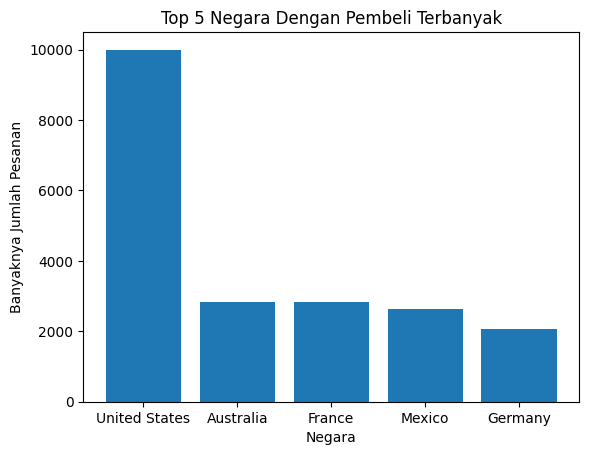

In [85]:
# Melakukan dataset visualization peringkat negara dengan pembeli terbanyak
plt.bar(x,y)
plt.xlabel('Negara')
plt.ylabel('Banyaknya Jumlah Pesanan')
plt.title('Top 5 Negara Dengan Pembeli Terbanyak')

## Analisa presentase penjualan berdasarkan kategori produk

In [86]:
dfc.head()

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
0,AU-2015-1,2015-11-09,2015-11-17,8,First Class,Auto & Accessories,Car Media Players,140.0,2,0.05,...,4.6,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov
1,AU-2015-2,2015-06-30,2015-07-02,2,First Class,Auto & Accessories,Car Speakers,211.0,3,0.03,...,11.2,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun
2,AU-2015-3,2015-12-05,2015-12-13,8,First Class,Auto & Accessories,Car Body Covers,117.0,5,0.01,...,3.1,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec
3,AU-2015-4,2015-05-09,2015-05-16,7,First Class,Auto & Accessories,Car & Bike Care,118.0,2,0.05,...,2.6,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May
4,AU-2015-5,2015-07-09,2015-07-18,9,First Class,Auto & Accessories,Tyre,250.0,1,0.04,...,16.0,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul


In [87]:
dfc['product_category'].unique()

array(['Auto & Accessories', 'Electronic', 'Home & Furniture', 'Fashion'],
      dtype=object)

In [88]:
# Pivoting table
dfc_pivot = dfc.pivot_table(index=['product_category'], values=['sales($)'], aggfunc='sum')

# Sort Values sales($)
dfc_sort = dfc_pivot.sort_values(by='sales($)', ascending=False)

In [89]:
dfc_sort

,sales($)
product_category,
Fashion,5212522.0
Home & Furniture,1319407.0
Auto & Accessories,1097139.0
Electronic,394738.0


array([<Axes: ylabel='sales($)'>], dtype=object)

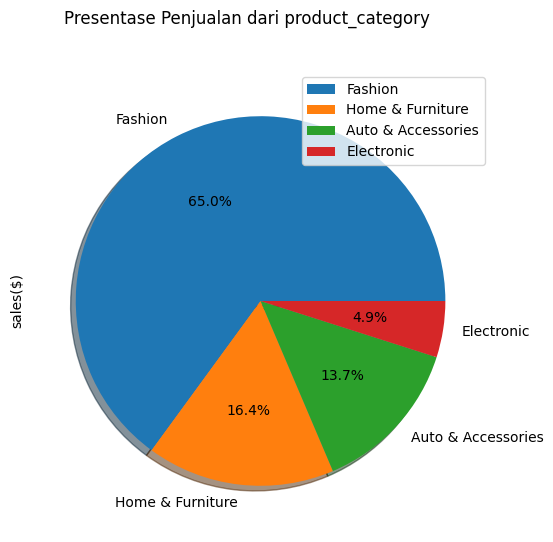

In [90]:
# Data Visualization
dfc_sort.plot.pie(
    title="Presentase Penjualan dari product_category",
    autopct='%1.1f%%',
    subplots=True,
    shadow=True,
    figsize=(11, 6)
)

## Bulan dengan total frekuensi penjualan terbanyak Tahun 2015 & 2016

In [91]:
# dikarenakan datanya ini merupakan data penjualan tahun pada tahun 2015 & 2016 maka:
y = dfc['months'].value_counts()
x = y.index

Text(0.5, 1.0, 'Bulan Dengan Jumlah Pesanan Terbanyak 2015-2016')

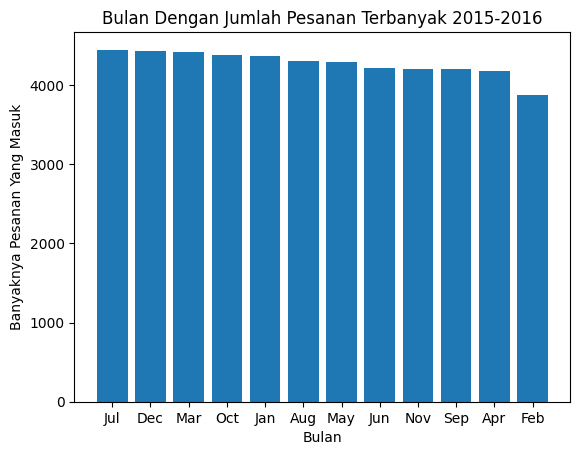

In [92]:
# Data Visualisasi
plt.bar(x,y)
plt.xlabel('Bulan')
plt.ylabel('Banyaknya Pesanan Yang Masuk')
plt.title('Bulan Dengan Jumlah Pesanan Terbanyak 2015-2016')

## Analisa Produk dan Tingkat Penjualannya

In [93]:
# Pivot
dfc_pivot = dfc.pivot_table(index='product', values='sales($)', aggfunc='sum')

# sort_values
dfc_sort = dfc_pivot.sort_values(by='sales($)', ascending=False)

dfc_sort.head()

,sales($)
product,
T - Shirts,692912.0
Titak watch,637260.0
Running Shoes,626080.0
Jeans,609092.0
Formal Shoes,595335.0


Text(0.5, 1.0, 'Barang Beserta Penjualannya')

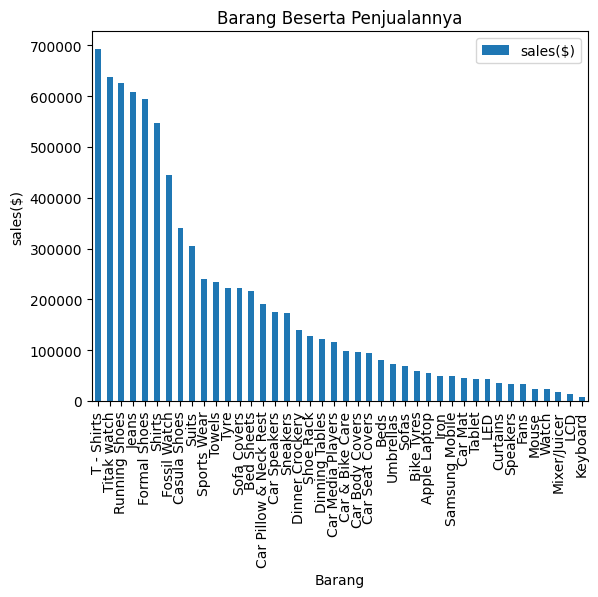

In [94]:
dfc_sort.plot(kind='bar')
plt.xlabel('Barang')
plt.ylabel('sales($)')
plt.title('Barang Beserta Penjualannya')

## Analisa Grafik Penjualan

In [95]:
dfc.head()

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
0,AU-2015-1,2015-11-09,2015-11-17,8,First Class,Auto & Accessories,Car Media Players,140.0,2,0.05,...,4.6,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov
1,AU-2015-2,2015-06-30,2015-07-02,2,First Class,Auto & Accessories,Car Speakers,211.0,3,0.03,...,11.2,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun
2,AU-2015-3,2015-12-05,2015-12-13,8,First Class,Auto & Accessories,Car Body Covers,117.0,5,0.01,...,3.1,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec
3,AU-2015-4,2015-05-09,2015-05-16,7,First Class,Auto & Accessories,Car & Bike Care,118.0,2,0.05,...,2.6,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May
4,AU-2015-5,2015-07-09,2015-07-18,9,First Class,Auto & Accessories,Tyre,250.0,1,0.04,...,16.0,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul


In [96]:
dfc_pivot

,sales($)
product,
Apple Laptop,55250.0
Bed Sheets,216908.0
Beds,80262.0
Bike Tyres,59472.0
Car & Bike Care,97468.0
Car Body Covers,96642.0
Car Mat,44604.0
Car Media Players,115640.0
Car Pillow & Neck Rest,191499.0


In [97]:
# Pivot
dfc_pivot = dfc.pivot_table(index='order_date', values='sales($)', aggfunc='sum')

# Reset Index
dfc_pivot = dfc_pivot.reset_index()

# Kita melakukan datetime -> agar strf bisa membaca datetime
dfc_pivot['order_date'] =pd.to_datetime(dfc_pivot['order_date'], format='%Y-%m-%d')

# Mengubah order_date ke dalam datetime
dfc_pivot['Year_Month'] = dfc_pivot['order_date'].dt.strftime("%Y-%m")

# Pivot ke-2
dfc_pivott = dfc_pivot.pivot_table(index='Year_Month', values='sales($)', aggfunc='sum')

# Drop tahun 2016
dfc_pivott.drop('2016-01', inplace=True)

In [98]:
dfc_pivott

,sales($)
Year_Month,
2015-01,676313.0
2015-02,610240.0
2015-03,686681.0
2015-04,659193.0
2015-05,672547.0
2015-06,664560.0
2015-07,685152.0
2015-08,670999.0
2015-09,658844.0


Text(0.5, 1.0, 'Data Penjualan tahun 2015')

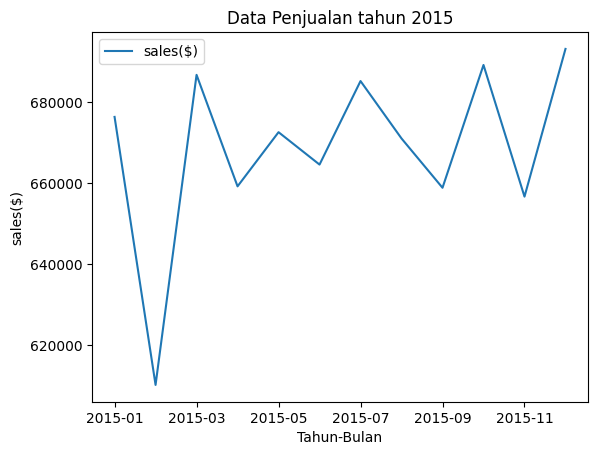

In [99]:
dfc_pivott.plot(kind='line')
plt.xlabel('Tahun-Bulan')
plt.ylabel('sales($)')
plt.title('Data Penjualan tahun 2015')